In [270]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [271]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [272]:
import sklearn
from sklearn.metrics import mean_squared_error

In [273]:
data = pd.read_csv('CPI (ianuarie 2023).csv')
data.head()

,Year,Month,Republic of Moldova,France,Portugal,Luxembourg,Norway,Romania,Japan,Italy,Germany,UK
0,2005,January,101.1,86.52,84.86,80.20,81.2,62.53,95.29,83.57,80.88,78.3
1,2005,February,103.2,87.05,84.82,81.46,81.3,62.90,95.00,83.84,81.23,78.5
2,2005,March,104.0,87.60,85.11,81.61,81.7,63.08,95.29,84.11,81.59,78.8
3,2005,April,105.5,87.77,85.69,81.90,82.1,64.23,95.39,84.24,81.41,79.1
4,2005,May,105.6,87.83,86.05,82.01,82.4,64.41,95.49,84.51,81.59,79.4


In [274]:
data.tail()

,Year,Month,Republic of Moldova,France,Portugal,Luxembourg,Norway,Romania,Japan,Italy,Germany,UK
212,2022,September,124.69,112.74,115.56,117.00,125.6,136.99,103.1,114.2,112.7,122.3
213,2022,October,127.95,113.90,116.99,118.02,126.0,138.75,103.7,118.1,113.5,124.3
214,2022,November,129.26,114.26,117.29,117.78,125.8,140.48,103.9,118.7,113.7,124.8
215,2022,December,130.24,114.16,116.94,117.06,125.9,141.00,104.1,119.0,113.2,125.3
216,2023,January,100.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
data.shape

(217, 12)

In [276]:
data_ap = data[['Year', 'Month','Republic of Moldova']]

In [277]:
data_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 217 non-null    int64  
 1   Month                217 non-null    object 
 2   Republic of Moldova  217 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


In [278]:
data_ap.describe()

,Year,Republic of Moldova
count,217.000000,217.000000
mean,2013.543779,104.429124
std,5.228056,5.287881
min,2005.000000,96.600000
25%,2009.000000,101.000000
50%,2014.000000,103.500000
75%,2018.000000,105.900000
max,2023.000000,130.240000


In [279]:
data_ap.isnull().sum()

Year                   0
Month                  0
Republic of Moldova    0
dtype: int64

In [280]:
data_ap[data_ap['Republic of Moldova'].isnull()]

,Year,Month,Republic of Moldova


In [281]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Year,Republic of Moldova,France,Portugal,Luxembourg,Norway,Romania,Japan,Italy,Germany,UK
count,217.000000,217.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,2013.543779,104.429124,98.649306,98.727917,97.541620,98.974074,95.294537,97.285417,97.488935,93.440046,97.500926
std,5.228056,5.287881,6.223036,6.639537,8.867624,11.481746,17.042804,2.365359,7.147025,7.223336,11.071434
min,2005.000000,96.600000,86.520000,84.820000,80.200000,81.200000,62.530000,94.000000,83.570000,80.880000,78.300000
25%,2009.000000,101.000000,93.612500,93.267500,90.012500,89.900000,82.492500,95.100000,91.742500,87.600000,88.075000
50%,2014.000000,103.500000,99.585000,100.315000,99.240000,96.650000,98.625000,97.525000,99.720000,93.890000,98.950000
75%,2018.000000,105.900000,103.115000,103.202500,103.420000,108.600000,104.455000,99.325000,102.300000,98.495000,105.900000
90%,2021.000000,109.290000,105.470000,104.740000,107.760000,114.750000,114.170000,100.100000,103.600000,101.850000,109.550000
95%,2022.000000,113.668000,108.325000,107.097500,111.825000,118.950000,123.137500,100.550000,108.550000,105.400000,114.875000
99%,2022.000000,127.428400,113.822000,116.733000,117.051000,125.770000,138.486000,103.610000,117.515000,113.125000,124.000000


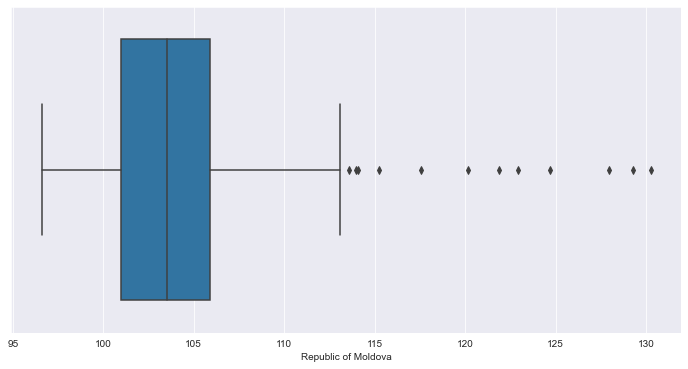

In [282]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Republic of Moldova'])
plt.show()

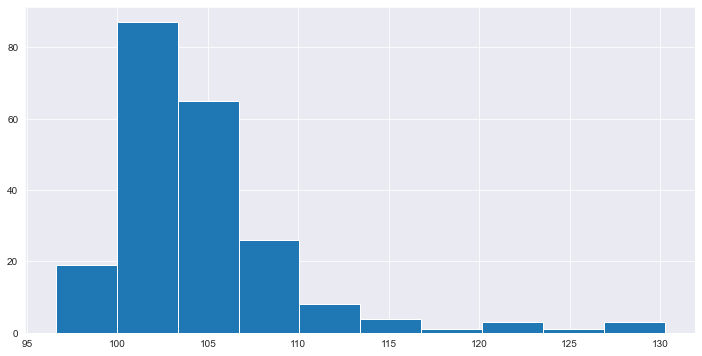

In [283]:
plt.figure(figsize=(12,6))
plt.hist(data['Republic of Moldova'])
plt.show()

In [284]:
data_ap[data_ap['Republic of Moldova']<3000]

,Year,Month,Republic of Moldova
0,2005,January,101.10
1,2005,February,103.20
2,2005,March,104.00
3,2005,April,105.50
4,2005,May,105.60
...,...,...,...
212,2022,September,124.69
213,2022,October,127.95
214,2022,November,129.26
215,2022,December,130.24


In [285]:
data_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 217 non-null    int64  
 1   Month                217 non-null    object 
 2   Republic of Moldova  217 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


In [286]:
month_map={'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}

In [287]:
data_ap['Month'] = data_ap['Month'].map(month_map)

In [288]:
data_ap

,Year,Month,Republic of Moldova
0,2005,1,101.10
1,2005,2,103.20
2,2005,3,104.00
3,2005,4,105.50
4,2005,5,105.60
...,...,...,...
212,2022,9,124.69
213,2022,10,127.95
214,2022,11,129.26
215,2022,12,130.24


In [289]:
from datetime import datetime
data_ap['Date'] = data_ap.apply(lambda row: datetime.strptime(f"{int(row.Year)}/{int(row.Month)}/{int(1)}", '%Y/%m/%d'), axis=1)

In [290]:
data_ap.head()

,Year,Month,Republic of Moldova,Date
0,2005,1,101.1,2005-01-01
1,2005,2,103.2,2005-02-01
2,2005,3,104.0,2005-03-01
3,2005,4,105.5,2005-04-01
4,2005,5,105.6,2005-05-01


In [291]:
data1 = data_ap.groupby(['Date'])['Republic of Moldova'].median().reset_index()
data1.head()

,Date,Republic of Moldova
0,2005-01-01,101.1
1,2005-02-01,103.2
2,2005-03-01,104.0
3,2005-04-01,105.5
4,2005-05-01,105.6


In [292]:
data1 = pd.DataFrame(data1)

In [293]:
data1 = data1.set_index(["Date"])

In [294]:
data1.head()

,Republic of Moldova
Date,
2005-01-01,101.1
2005-02-01,103.2
2005-03-01,104.0
2005-04-01,105.5
2005-05-01,105.6


In [295]:
data1.index.dtype

dtype('<M8[ns]')

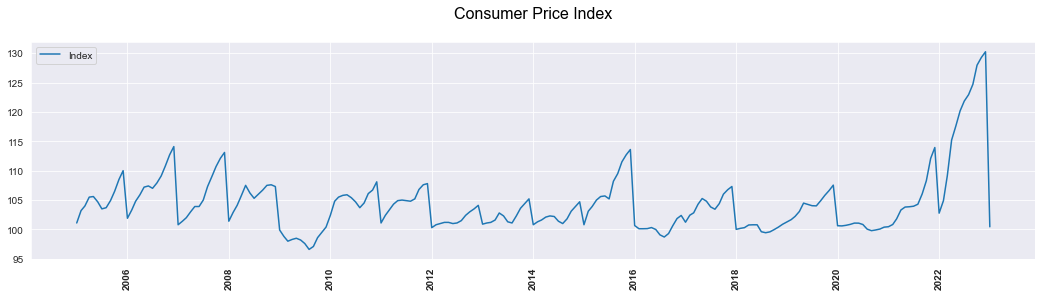

In [296]:
plt.figure(figsize=(18,4))
plt.plot(data1, label='Index')
plt.legend(loc='best')
plt.title('Consumer Price Index\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Black'})
plt.xticks(rotation = 90, fontweight="bold")
plt.show()

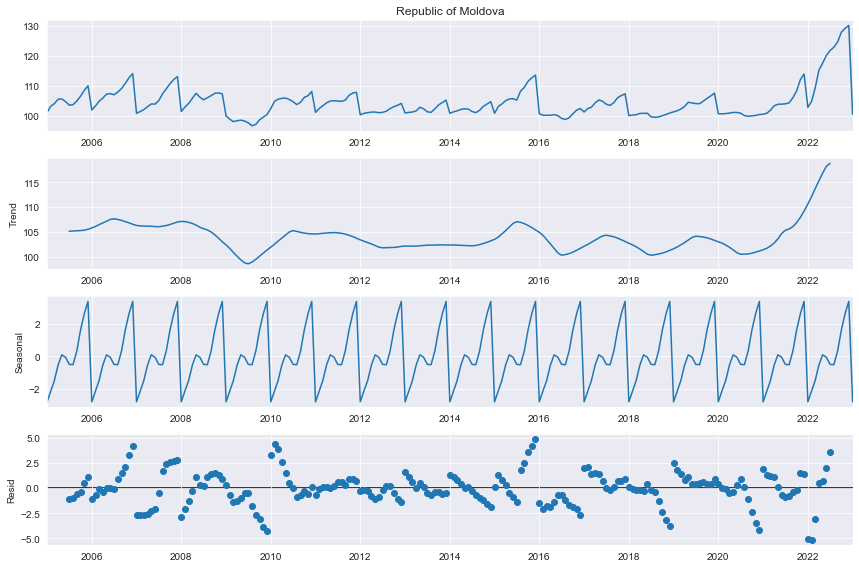

In [297]:
from pylab import rcParams
from scipy.fftpack import fftfreq
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1['Republic of Moldova'], model='additive',period=12)
fig = decomposition.plot()
plt.show()

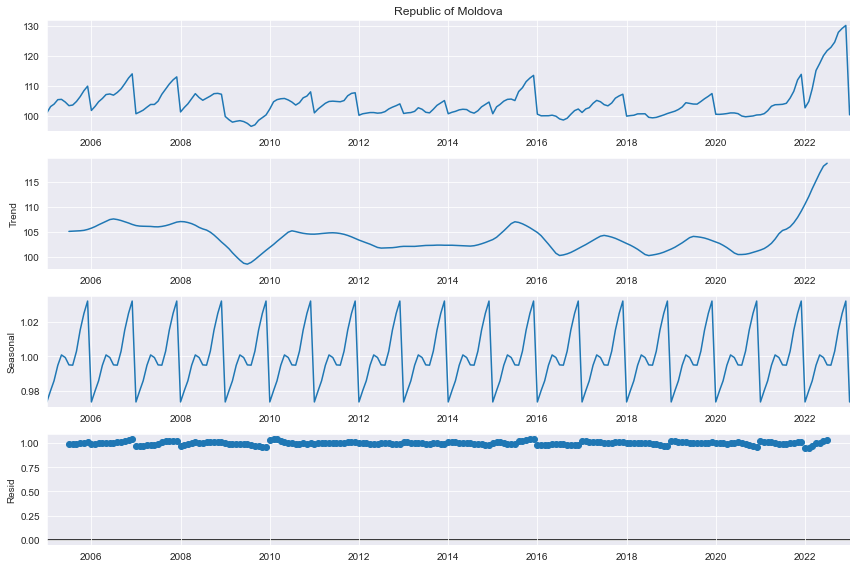

In [298]:
decomposition = sm.tsa.seasonal_decompose(data1['Republic of Moldova'], model='multiplicative', period=12)
fig = decomposition.plot()
plt.show()

In [299]:
train_len = 122
train = data1[0 : train_len]
test = data1[train_len : ]

In [300]:
train.head()

,Republic of Moldova
Date,
2005-01-01,101.1
2005-02-01,103.2
2005-03-01,104.0
2005-04-01,105.5
2005-05-01,105.6


In [301]:
test

,Republic of Moldova
Date,
2015-03-01,103.90
2015-04-01,105.00
2015-05-01,105.60
2015-06-01,105.70
2015-07-01,105.20
...,...
2022-09-01,124.69
2022-10-01,127.95
2022-11-01,129.26


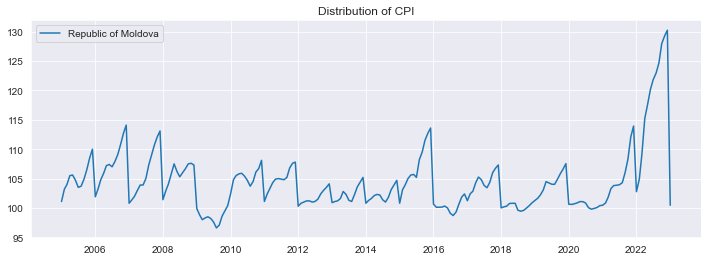

In [302]:
plt.figure(figsize=(12,4))
plt.plot(data1['Republic of Moldova'], label = 'Republic of Moldova')
plt.legend(loc='best')
plt.title('Distribution of CPI')
plt.show()

In [303]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Republic of Moldova'])
print(adf_test)
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

(-4.508054297790836, 0.00019015440279275013, 12, 204, {'1%': -3.462818103072159, '5%': -2.8758145932936805, '10%': -2.574378674548251}, 938.6563204614174)
ADF Statistic: -4.508054
Critical Values @ 0.05: -2.88
p-value: 0.000190


In [304]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data1['Republic of Moldova'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.178953
Critical Values @ 0.05: 0.46
p-value: 0.100000


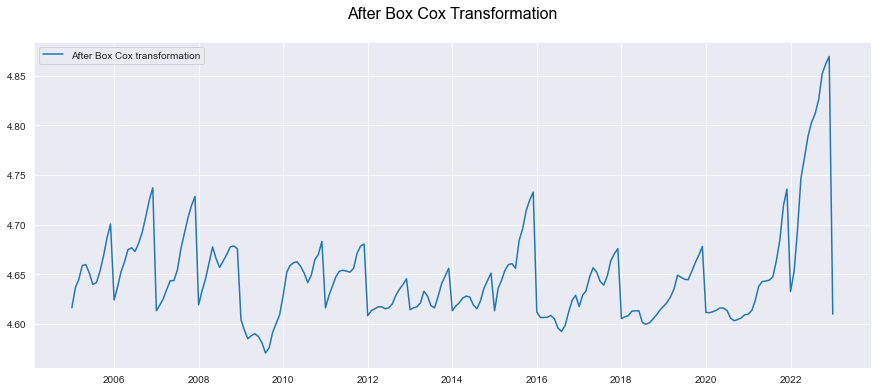

In [305]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Republic of Moldova'], lmbda=0), index = data1.index)

plt.figure(figsize=(15,6))
plt.plot(data_boxcox, label='After Box Cox transformation')
plt.legend(loc='best')
plt.title('After Box Cox Transformation\n', fontdict={'fontsize': 16, 'fontweight': 5, 'color' : 'Black'})
plt.show()

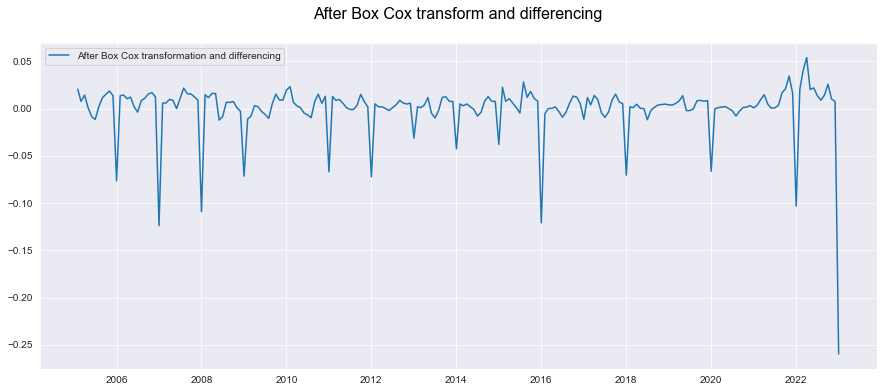

In [306]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize=(15,6))
plt.plot(data_boxcox_diff, label='After Box Cox transformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing\n', fontdict = {'fontsize': 16, 'fontweight': 5, 'color' : 'Black'})
plt.show()

In [307]:
data_boxcox_diff.dropna(inplace=True)

In [308]:
data_boxcox_diff.tail()

Date
2022-09-01    0.014216
2022-10-01    0.025809
2022-11-01    0.010186
2022-12-01    0.007553
2023-01-01   -0.259719
dtype: float64

In [309]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])

ADF Statistic: -4.709785
p-value: 0.000081
Critical Values @ 0.05: -2.88


In [310]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.044649
Critical Values @ 0.05: 0.46
p-value: 0.100000


In [311]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

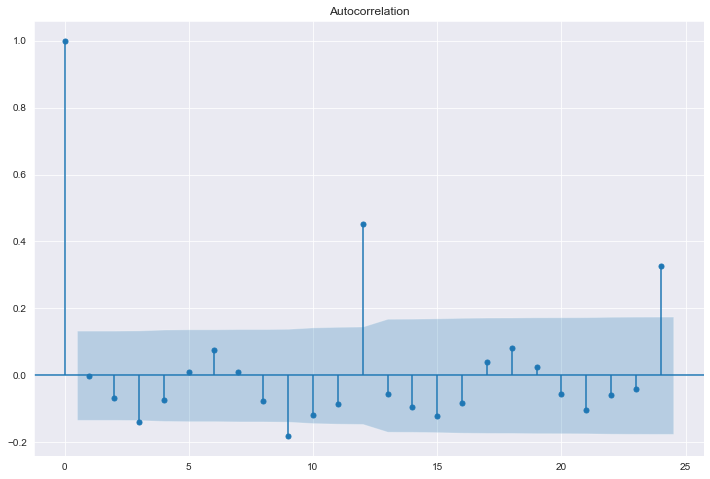

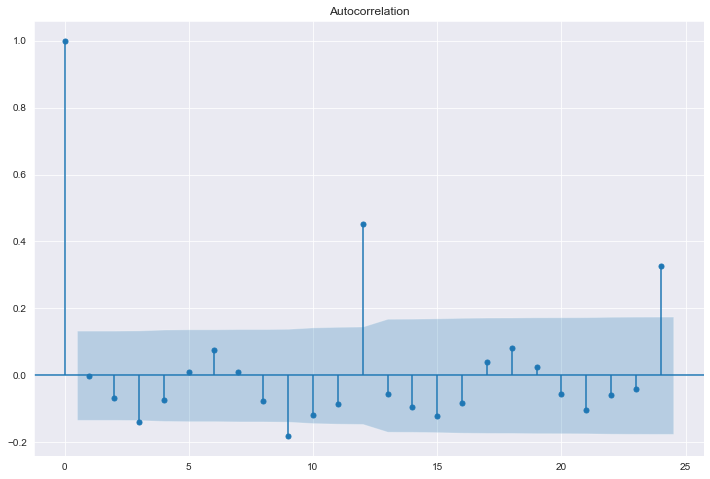

In [312]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_boxcox_diff)

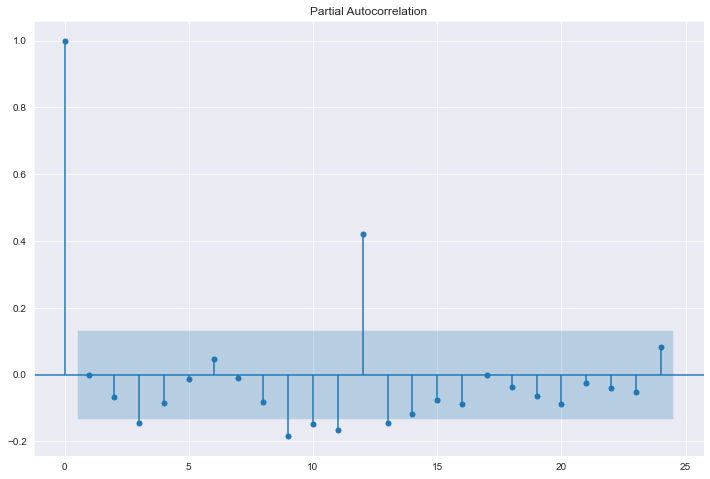

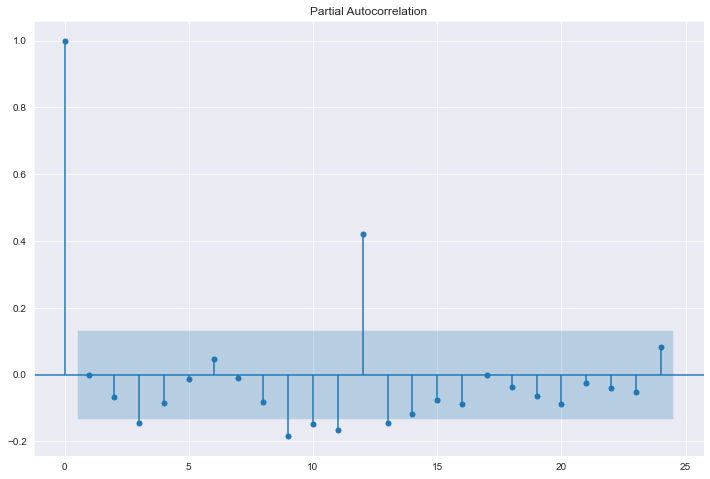

In [313]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_diff)

In [314]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_boxcox_diff, order=(2, 1, 9))
model_fit = model.fit()

import warnings
warnings.filterwarnings('ignore')

In [315]:
#Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

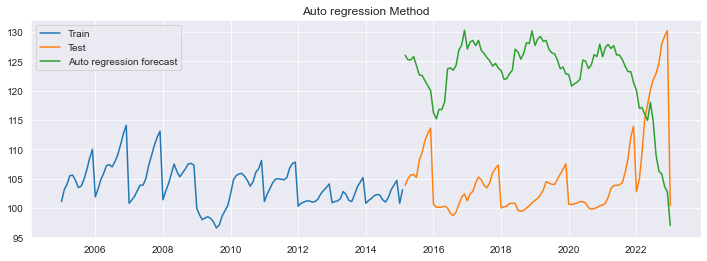

In [316]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Republic of Moldova'], label='Train')
plt.plot(test['Republic of Moldova'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto regression Method')
plt.show()

In [317]:
rmse = np.sqrt(mean_squared_error(test['Republic of Moldova'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Republic of Moldova']-y_hat_ar['ar_forecast'][test.index.min():])/test['Republic of Moldova'])*100,2)
print(mape)

19.62


In [318]:
future_predict = model_fit.predict(start = len(data1), end = (len(data1)) + 6)
future_predict = future_predict.cumsum()
future_predict = future_predict.add(data_boxcox[0])
future_predict = np.exp(future_predict)

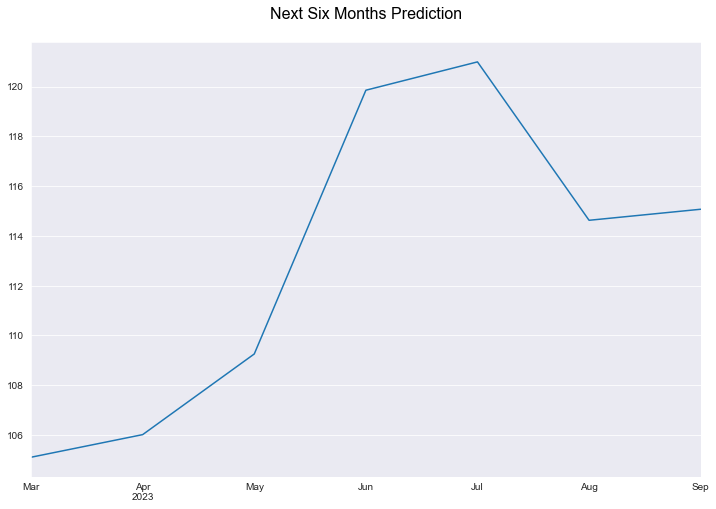

2023-03-01    105.108039
2023-04-01    106.016350
2023-05-01    109.256744
2023-06-01    119.851110
2023-07-01    120.989064
2023-08-01    114.626097
2023-09-01    115.069669
Freq: MS, Name: predicted_mean, dtype: float64


In [319]:
future_predict.plot()
plt.title('Next Six Months Prediction\n', fontdict={'fontsize' : 16, 'fontweight' : 5, 'color' : 'Black'})
plt.show()
print(future_predict)

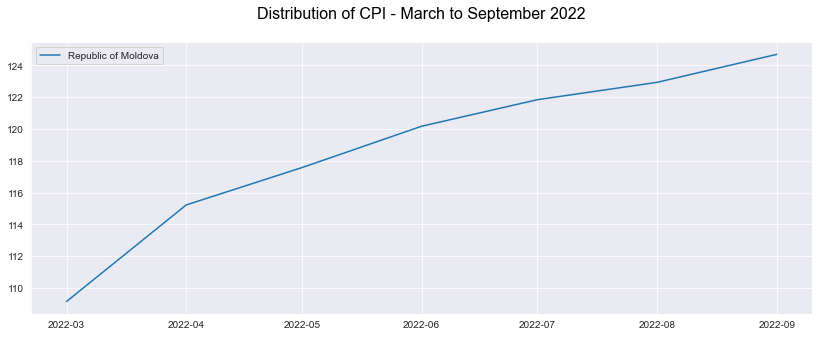

Date
2022-03-01    109.15
2022-04-01    115.22
2022-05-01    117.57
2022-06-01    120.17
2022-07-01    121.84
2022-08-01    122.93
2022-09-01    124.69
Name: Republic of Moldova, dtype: float64


In [320]:
data_subset = data1['Republic of Moldova'].loc['2022-03-01':'2022-09-01']
plt.figure(figsize=(14,5))
plt.plot(data_subset, label='Republic of Moldova')
plt.legend(loc='best')
plt.title('Distribution of CPI - March to September 2022\n',fontdict={'fontsize' : 16, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()
print(data_subset)

In [321]:
predicted_cpi = future_predict.loc['2023-03-01':'2023-09-01']
_cpi = data_subset
inflation_rate = ((predicted_cpi['2023-03-01'] - actual_cpi['2022-03-01']) / actual_cpi['2022-03-01']) * 100
print(f"Annual inflation rate: {inflation_rate:.2f}%")

Annual inflation rate: -3.70%
